In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML

In [2]:
HTML('''<script>
function code_toggle() {
 if (code_show){
 $('div.input').hide('500');
 $('div.prompt').hide();
 } else {
 $('div.input').show('500');
 $('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(function(){
    code_show=true;
    $('div.input').show()
    $('div.prompt').show();
  });
</script>
<font size="4" color='red'>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</font>''')

**Collection of Data**

In [3]:
legitimate_urls = pd.read_csv("extracted_csv_files/legitimate-urls.csv")
phishing_urls = pd.read_csv("extracted_csv_files/phishing-urls.csv")
realtime=pd.read_csv("extracted_csv_files/real-time.csv")

In [4]:
legitimate_urls.head(10)
phishing_urls.head(10)
realtime.head(5)

Domain  Having_@_symbol  Having_IP  \
0  123movieonlinez.in.websiteoutlook.com                0          0   
1              allmarketing.go2cloud.org                0          0   
2                        constintptr.com                0          0   
3                        constintptr.com                0          0   
4                        constintptr.com                0          0   

        Path  Prefix_suffix_separation Protocol  Redirection_//_symbol  \
0          /                         0     http                      0   
1     /aff_c                         0     http                      0   
2  /1675303/                         0     http                      0   
3          /                         0     http                      0   
4   /afu.php                         0     http                      0   

   Sub_domains  URL_Length  age_domain  dns_record  \
0            2           0           1           1   
1            0           2           1           1   
2            0           0           1           1   
3            0           0           1           1   
4            0           1           1           1   

   domain_registration_length  http_tokens  label  statistical_report  \
0                           1            0      1                   0   
1                           1            0      1                   0   
2                           1            0      1                   0   
3                           1            0      1                   0   
4                           1            0      1                   0   

   tiny_url  web_traffic  
0         0            0  
1         0            0  
2         0            0  
3         0            0  
4         0            0

## Data PreProcessing
#### Data is in two data frames so we merge them to make one dataframe
Note: two dataframes has same column names

In [5]:
urls = legitimate_urls.append(phishing_urls)


In [6]:
urls.head(5)

Domain  Having_@_symbol  Having_IP  \
0  www.liquidgeneration.com                0          0   
1       www.onlineanime.org                0          0   
2       www.ceres.dti.ne.jp                0          0   
3            www.galeon.com                0          0   
4       www.fanworkrecs.com                0          0   

                          Path  Prefix_suffix_separation Protocol  \
0                            /                         0     http   
1                            /                         0     http   
2  /~nekoi/senno/senfirst.html                         0     http   
3                        /kmh/                         0     http   
4                            /                         0     http   

   Redirection_//_symbol  Sub_domains  URL_Length  age_domain  dns_record  \
0                      0            0           0           0           0   
1                      0            0           0           0           0   
2                      0            1           0           1           0   
3                      0            0           0           0           0   
4                      0            0           0           1           1   

   domain_registration_length  http_tokens  label  statistical_report  \
0                           1            0      0                   0   
1                           1            0      0                   1   
2                           1            0      0                   0   
3                           0            0      0                   0   
4                           1            0      0                   1   

   tiny_url  web_traffic  
0         0            2  
1         0            1  
2         0            0  
3         0            0  
4         0            1

In [7]:
urls.shape[1]#number of columns

17

In [8]:
urls.columns

Index(['Domain', 'Having_@_symbol', 'Having_IP', 'Path',
       'Prefix_suffix_separation', 'Protocol', 'Redirection_//_symbol',
       'Sub_domains', 'URL_Length', 'age_domain', 'dns_record',
       'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

#### Removing Unnecessary columns

In [9]:
urls = urls.drop(urls.columns[[0,3,5]],axis=1)
realtime = realtime.drop(realtime.columns[[0,3,5]],axis=1)

In [10]:
urls.head(5)

Having_@_symbol  Having_IP  Prefix_suffix_separation  \
0                0          0                         0   
1                0          0                         0   
2                0          0                         0   
3                0          0                         0   
4                0          0                         0   

   Redirection_//_symbol  Sub_domains  URL_Length  age_domain  dns_record  \
0                      0            0           0           0           0   
1                      0            0           0           0           0   
2                      0            1           0           1           0   
3                      0            0           0           0           0   
4                      0            0           0           1           1   

   domain_registration_length  http_tokens  label  statistical_report  \
0                           1            0      0                   0   
1                           1            0      0                   1   
2                           1            0      0                   0   
3                           0            0      0                   0   
4                           1            0      0                   1   

   tiny_url  web_traffic  
0         0            2  
1         0            1  
2         0            0  
3         0            0  
4         0            1

#### Since we merged two dataframes top 1000 rows will have legitimate urls and bottom 1000 rows will have phishing urls. So if we split the data now and create a model for it will overfit so we need to shuffle the rows before splitting the data into training set and test set

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

#### Removing class variable from the dataset

In [12]:
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']

real_without_labels = realtime.drop('label',axis=1)
real_without_labels.columns
r_labels = realtime['label']

#### splitting the data into train data and test data

Dividing the data in the ratio of 70:30 [train_data:test_data]

In [13]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)
real_data_train, real_data_test, real_labels_train, real_labels_test = train_test_split(real_without_labels, r_labels, test_size=0.90, random_state=110)

In [14]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1410 605 1410 605


#### checking the split of labels in train and test data

The split should be in equal proportion for both classes

Phishing - 1

Legitimate - 0


In [15]:
#initially checking the split of labels_train data 
labels_train.value_counts()


1    712
0    698
Name: label, dtype: int64

By above results it is shown that the split of both classes are almost equal!

Testing the same for labels of test data also

In [16]:
#checking the split for labels_test data
labels_test.value_counts()

0    319
1    286
Name: label, dtype: int64

as the split is almost in equal proportion we can train the model

#### Creating the model and fitting the data into the model

creating the model with default parameters

In [17]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
random_forest_classifier.fit(data_train,labels_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predicting the result for test data

In [19]:
prediction_label_test = random_forest_classifier.predict(data_test)

prediction_label_train = random_forest_classifier.predict(data_train)

real_pred_label=random_forest_classifier.predict(real_data_test)
print(real_pred_label)

[1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1]


#### Creating confusion matrix and checking the accuracy

Testing
0.828099173553719


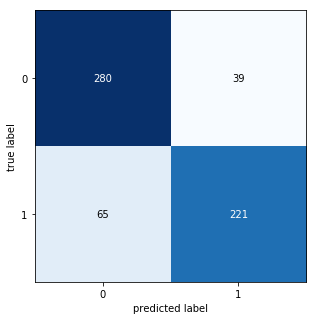

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       319
          1       0.85      0.77      0.81       286

avg / total       0.83      0.83      0.83       605

Training
0.8730496453900709


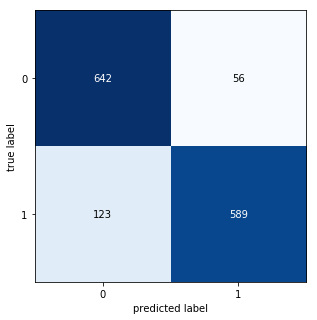

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       698
          1       0.91      0.83      0.87       712

avg / total       0.88      0.87      0.87      1410



In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(labels_test,prediction_label_test)
cm2 = confusion_matrix(labels_train,prediction_label_train)

cr=classification_report(labels_test,prediction_label_test)
cr2=classification_report(labels_train,prediction_label_train)

#print(cpnfusionMatrix)
#print(cm2)

print("Testing")
print(accuracy_score(labels_test,prediction_label_test))
fig, ax = plot_confusion_matrix(cm,  figsize=(10, 5))
plt.show()
print(cr)


print("Training")
print(accuracy_score(labels_train,prediction_label_train))
fig2, ax2 = plot_confusion_matrix(cm2 ,  figsize=(10, 5))
plt.show()
print(cr2)

### Improving the efficiency of model by specifying max_depth as well as number of tress 

In [21]:
custom_random_forest_classifier = RandomForestClassifier(n_estimators=10000, max_depth=40, max_leaf_nodes=20000)

In [22]:
custom_random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=20000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
custom_classifier_prediction_label_test = custom_random_forest_classifier.predict(data_test)
custom_classifier_prediction_label_train = custom_random_forest_classifier.predict(data_train)

Testing
0.8297520661157025


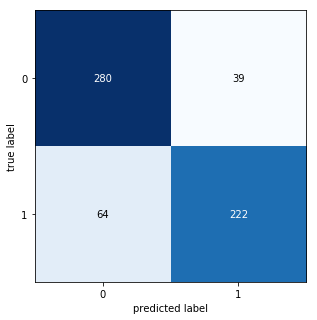

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       319
          1       0.85      0.78      0.81       286

avg / total       0.83      0.83      0.83       605

Training
0.873758865248227


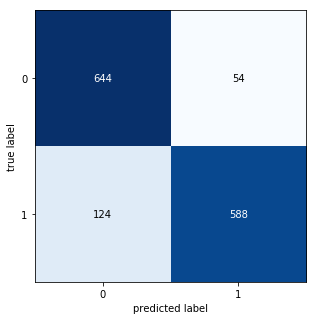

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       698
          1       0.92      0.83      0.87       712

avg / total       0.88      0.87      0.87      1410



In [29]:
#from sklearn.metrics import confusion_matrix,accuracy_score
confusionMatrix3 = confusion_matrix(labels_test,custom_classifier_prediction_label_test)
confusionMatrix4 = confusion_matrix(labels_train,custom_classifier_prediction_label_train)

cr3=classification_report(labels_test,custom_classifier_prediction_label_test)
cr4=classification_report(labels_train,custom_classifier_prediction_label_train)

#print(confusionMatrix3)
#print(confusionMatrix4)

print("Testing")
print(accuracy_score(labels_test,custom_classifier_prediction_label_test))
fig3, ax3 = plot_confusion_matrix(confusionMatrix3,  figsize=(10, 5))
plt.show()
print(cr3)

print("Training")
print(accuracy_score(labels_train,custom_classifier_prediction_label_train))
fig4, ax4 = plot_confusion_matrix(confusionMatrix4 ,  figsize=(10, 5))
plt.show()
print(cr4)

## Feature Importance

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#feature_importances_ : array of shape = [n_features] ------ The feature importances (the higher, the more important the feature).

#feature_importances_  -- This method returns the quantified relative importance in the order the features were fed to the algorithm

importances = custom_random_forest_classifier.feature_importances_

#std = np.std([tree.feature_importances_ for tree in custom_random_forest_classifier.estimators_],axis=0)   #[[[estimators_ :explaination ---  list of DecisionTreeClassifier ----- (The collection of fitted sub-estimators.)]]]

#To make the plot pretty, we’ll instead sort the features from most to least important.
indices = np.argsort(importances)[::-1] 
print(f"indices of columns : {indices}")

# Print the feature ranking
print("\n ***Feature ranking: *** \n")
print("Feature name : Importance")

for f in range(data_train.shape[1]):
    print(f"{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")
    
print("**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],
       color="b", align="center")   
#yerr=std[indices] -- this is another parameter that can be included if std is calculated above
#and also it gives error bar that's the reason we calculate std above. but here we are not making it plot.

plt.xticks(range(data_train.shape[1]), data_train.columns[indices])
plt.xlim([-1, data_train.shape[1]])

plt.rcParams['figure.figsize'] = (350,150)  #this will increase the size of the plot
plt.show()

indices of columns : [ 5 12 10  4  6  8  7  2 11  1  0  3  9]

 ***Feature ranking: *** 

Feature name : Importance
1 URL_Length   :  0.2174615149436429 

2 web_traffic   :  0.19379669530243787 

3 statistical_report   :  0.16185492319556796 

4 Sub_domains   :  0.07811771190846122 

5 age_domain   :  0.07754167899606436 

6 domain_registration_length   :  0.06658292443847202 

7 dns_record   :  0.06618727036433582 

8 Prefix_suffix_separation   :  0.06406729164327125 

9 tiny_url   :  0.05687166466577154 

10 Having_IP   :  0.0075368316586935874 

11 Having_@_symbol   :  0.004745775456951496 

12 Redirection_//_symbol   :  0.004414012702686135 

13 http_tokens   :  0.0008217047236454897 

**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****


<Figure size 640x480 with 1 Axes>

In [26]:
#click on the image to get clear view

In [30]:
np.savetxt("RFpredictionTest.txt",prediction_label_test)
np.savetxt("RFpredictionTrain.txt",prediction_label_train)
np.savetxt("RFpredictionReal.txt",real_pred_label)